In [1]:
from google.colab import files
files.upload() # kaggle.jsonをアップロード
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
# データの準備（Kaggle API を用いたデータのダウンロード）
!kaggle datasets download -d \
sgonkaggle/youtube-trend-with-subscriber
!unzip youtube-trend-with-subscriber.zip

  0% 0.00/2.45M [00:00<?, ?B/s]
100% 2.45M/2.45M [00:00<00:00, 82.1MB/s]
Archive:  youtube-trend-with-subscriber.zip
  inflating: USvideos_modified.csv   


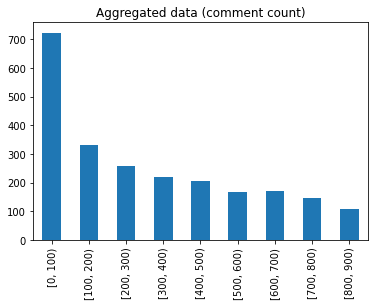

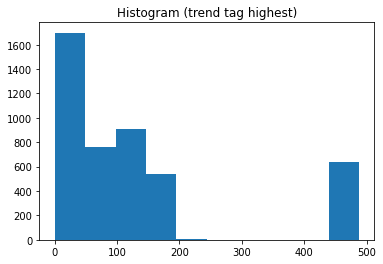

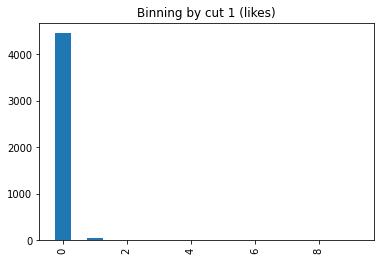

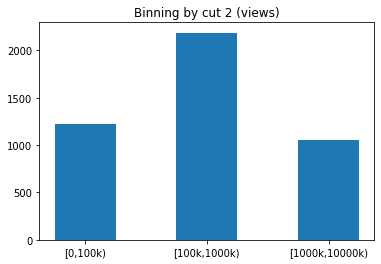

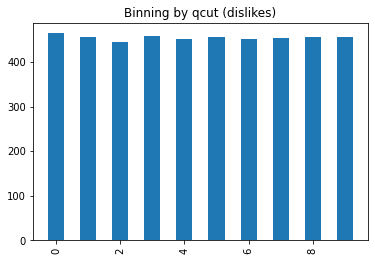

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# データのダウンロード等はプログラム3.1と同じなので省略

df = pd.read_csv('USvideos_modified.csv')

# cutを使わない例（value_countsを使用する）
# コメント数（100件ずつに区切る）ごとの
# 動画の件数を集計した結果をグラフ化する
plt.figure()
pd.cut(df['comment_count'], range(0,1000, 100),   
       right=False).value_counts(sort=False).plot.bar(
       title='Aggregated data (comment count)') 
plt.savefig('3.2-aggregated_data.png', dpi=500)
plt.show

# トレンドタグの最高値をヒストグラム化
plt.figure()
plt.hist(df['trend_tag_highest'], bins=10) 
plt.title('Histogram (trend tag highest)')
plt.savefig('3.2-histogram.png', dpi=500)
plt.show()

# ビニング(cut)
# likesをN分割する（N=10）
v_cut = pd.cut(df['likes'].values, bins=10, labels=list(range(10)))

# ビニング結果を可視化（matplotlibによりグラフ作成）
plt.figure()
plot_data = v_cut.value_counts().sort_index()
# 横軸の目盛ラベルを90度回転させる
plt.xticks(rotation=90)
plt.bar( plot_data.index, plot_data, width=0.5)
plt.title('Binning by cut 1 (likes)')
plt.savefig('3.2-binning_by_cut1.png', dpi=500)
plt.show

# 視聴回数(views)をビニング 
bins = [-1,100000,1000000,10000000]
labels = ['[0,100k)', '[100k,1000k)', '[1000k,10000k)']
v_cut = pd.cut(df['views'], bins=bins, labels=labels)

# ビニング結果を可視化する（matplotlibによりグラフ作成）
plt.figure()
# value_countsを用いて各ビンに属するデータ件数をカウント
plot_data = v_cut.value_counts().sort_index()
plt.bar(plot_data.index, plot_data, width=0.5)
plt.title('Binning by cut 2 (views)')
plt.savefig('3.2-binning_by_cut2.png', dpi=500)
plt.show()

# dislikesをビニング
# 10等分（10個のビン）に分割
v_qcut = pd.qcut(df['dislikes'],10) 
count_result = v_qcut.value_counts
# ビニング結果を可視化（matplotlibによりグラフ作成）
plt.figure()
plot_data = v_qcut.value_counts().sort_index()
plt.xticks(rotation=90)
plt.bar(list(range(0,10)), plot_data, width=0.5)
plt.title('Binning by qcut (dislikes)')
plt.savefig('3.2-binning_by_qcut.png', dpi=500)
plt.show()

